In [ ]:
import pandas as pd 
import numpy as np 
import os
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
cwd = os.getcwd()  
files = os.listdir(cwd)  

In [ ]:
q1=[2.64, 3.04, 4.31, 5.05]
q2=[3.07, 4.34, 5.32, 6.14]
lam = 0.7107
def f(x):
    return np.arccos(1 - 1/2*(x*lam/(2*np.pi))**2)

A = [5.43102, 6.482, 6.29,4.079,4.065,3.155,2.856,3.142]
Name = ["si (f)", "CdTe(f)", "KCl(f)", "Ag(f)","Au(f)","W(b)","Fe(b)","Mo(b)"]
def g(x,y):
    return 4*x**2/lam**2*np.sin(y/2)**2 


print("Sample 1")
for k in range(1,20):
  C1 = k/np.sin(f(q1[0])/2)**2
  for j in q1:
    print(C1*np.sin(f(j)/2)**2)
  print(np.sqrt(C1)*lam/2)
  print("-----")


print("Sample 2")
K=[]
for k in [2,4]:
  C2 = k/np.sin(f(q2[0])/2)**2
  for j in q2:
    print(C2*np.sin(f(j)/2)**2)
    K.append(np.sin(f(j)/2))
  print(np.sqrt(C2)*lam/2)
  print("-----")

def a(x):
  return np.sqrt(x)*lam/4


L1 = [3,4,8,11]
L21=[2,4,6,8]
L22 = [4,8,12,16]
w=0
l=0
for i in L1:
  l+=np.sqrt(i)*lam/2/np.sin(f(q1[w])/2)
  print(np.sqrt(i)*lam/2/np.sin(f(q1[w])/2))
  w+=1
v = 0
k=0
s=0
for j in q2:
  s+=np.sqrt(L21[v])*lam/2/np.sin(f(j)/2)
  print(np.sqrt(L21[v])*lam/2/np.sin(f(j)/2))
  print(np.sqrt(L22[v])*lam/2/np.sin(f(j)/2))
  k+=np.sqrt(L22[v])*lam/2/np.sin(f(j)/2)
  v+=1
print(l/4,k/4,s/4)
#for i in L3:
#  print(np.sqrt(i)*lam/2/K[w])
#  w+=1

Sample 1
1.0
1.325987144168963
2.6653036042240594
3.6591052571166207
2.3799944345377217
-----
2.0
2.651974288337926
5.330607208448119
7.318210514233241
3.365820407695731
-----
3.0000000000000004
3.977961432506889
7.995910812672179
10.977315771349863
4.122271282350495
-----
4.0
5.303948576675852
10.661214416896238
14.636421028466483
4.7599888690754435
-----
5.0
6.629935720844815
13.326518021120297
18.2955262855831
5.321829341697519
-----
6.000000000000001
7.955922865013778
15.991821625344357
21.954631542699726
5.8297719552812
-----
7.0
9.281910009182742
18.657125229568415
25.613736799816344
6.296873395504607
-----
8.0
10.607897153351704
21.322428833792475
29.272842056932966
6.731640815391462
-----
9.0
11.933884297520667
23.987732438016533
32.93194731404959
7.139983303613166
-----
10.0
13.25987144168963
26.653036042240593
36.5910525711662
7.526203231663713
-----
11.0
14.585858585858592
29.31833964646465
40.25015782828282
7.893548542495689
-----
12.000000000000002
15.911845730027556
31.98

In [ ]:
for i in L1:
  print(a(i))

0.30774212723480027
0.35436965846418766
0.502411996808334
0.5886649204306513


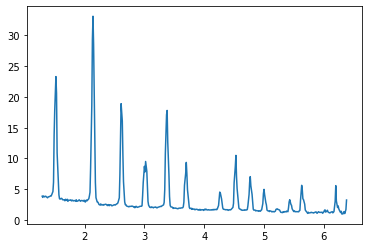

In [ ]:
df = pd.read_csv("cali1.csv") #Specimen 2
x=df["Q_1"]
y=df["I"]

xp = x[100:]
yp=y[100:]
plt.plot(xp,yp)

[2.64, 3.04, 4.31, 5.05] [ 15  46 146 204]


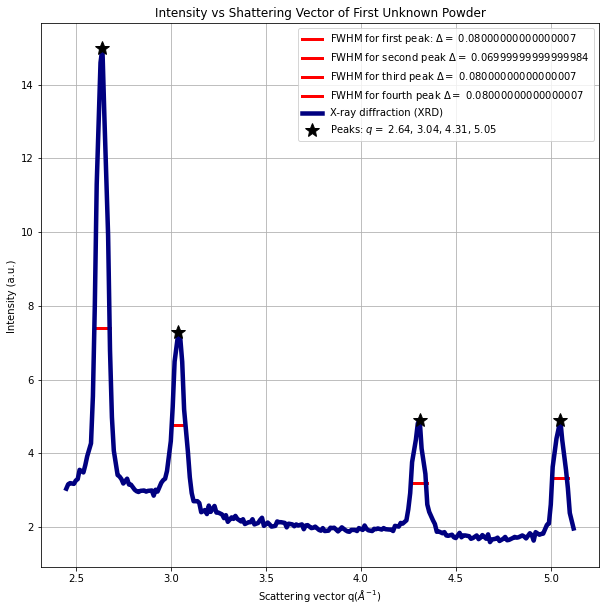

FWHM 1: 0.07000000000000028 FWHM 2: 0.06999999999999984
Q (peak 1 to peak 2): 3.141592653589794


In [ ]:
df1 = pd.read_csv("1 - Sheet1.csv") #Specimen 1




y1 = np.zeros((len(df1["1.04E+06"][190:400])))
v = 0
for i in df1["1.04E+06"][190:400]:
    y1[v] = i
    v+=1
peaks,_ = find_peaks(y1,height=4)
x1 = np.zeros((len(df1["1.04E+06"][190:400])))
w = 0
for j in df1["1.09E-02"][190:400]:
    x1[w] = j
    w+=1


print([x1[k] for k in peaks], peaks)
plt.figure(figsize = (10,10))
plt.plot([x1[12], x1[18]], [(y1[12] + y1[18])/2, (y1[12] + y1[18])/2], "red", lw = 3)
plt.plot([x1[43], x1[49]], [(y1[43] + y1[49])/2, (y1[43] + y1[49])/2], "red", lw = 3)
plt.plot([x1[143], x1[149]], [(y1[143] + y1[149])/2, (y1[143] + y1[149])/2], "red", lw = 3)
plt.plot([x1[201], x1[207]],[(y1[201] + y1[207])/2, (y1[201] + y1[207])/2], "red", lw = 3)
plt.plot(x1,y1, "navy", lw = 4.5)
plt.plot([x1[k] for k in peaks], [y1[k] for k in peaks], marker = "*",color= "black", ms=15,lw=0)
plt.title("Intensity vs Shattering Vector of First Unknown Powder")

plt.ylabel("Intensity (a.u.) ")
plt.xlabel("Scattering vector q" + r"($Å^{-1}$)")
plt.grid(True)

plt.legend(["FWHM for first peak: " + f"$\Delta =$ " + "{}".format(x1[18] - x1[12]), "FWHM for second peak " + f"$\Delta =$ " + "{}".format(x1[49] - x1[43]),
"FWHM for third peak " + f"$\Delta =$ " + "{}".format(x1[149] - x1[143]), "FWHM for fourth peak " + f"$\Delta =$ " + "{}".format(x1[207] - x1[201]),
 "X-ray diffraction (XRD)", "Peaks: " + f"$q=$" + " 2.64, 3.04, 4.31, 5.05"])

plt.show()
print("FWHM 1:", x1[18] - x1[13],"FWHM 2:", x1[49] - x1[43])
print("Q (peak 1 to peak 2):", (2*np.pi*(x1[46] - x1[15])**(-1))/5)



[3.07, 4.34, 5.32, 6.14] [ 34 133 210 274]


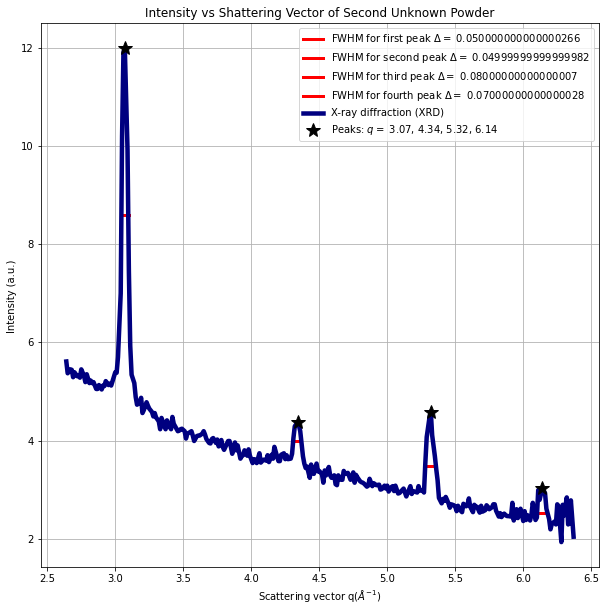

FWHM 1: 0.050000000000000266 FWHM 2: 0.05000000000000071
Q from peak 1 to peak 2: 1.27


In [ ]:
df2 = pd.read_csv("2 - Sheet1.csv") #Specimen 2


N = 205
M = 500
y2 = np.zeros((len(df2["I"][N:M])))
v = 0
for i in df2["I"][N:M]:
    y2[v] = i
    v+=1
peaks,_ = find_peaks(y2,distance=50)
x2 = np.zeros((len(df2["Q"][N:M])))
w = 0
for j in df2["Q"][N:M]:
    x2[w] = j
    w+=1

print([x2[k] for k in peaks], peaks)
plt.figure(figsize = (10,10))

plt.plot([x2[32], x2[36]], [(y2[32]+y2[31])/2, (y2[32]+y2[31])/2], "red", lw = 3)
plt.plot([x2[135], x2[131]], [(y2[133] + y2[129])/2, (y2[133] + y2[129])/2], "red", lw = 3)
plt.plot([x2[207], x2[213]], [(y2[207] + y2[213])/2, (y2[207] + y2[213])/2], "red", lw = 3)
plt.plot([x2[271], x2[277]], [(y2[271] + y2[277])/2, (y2[271] + y2[277])/2], "red", lw = 3)

plt.plot(x2,y2, "navy", lw = 4.5)
plt.plot([x2[k] for k in peaks], [y2[k] for k in peaks], marker ="*", color ="black", ms = 15, lw = 0)
plt.title("Intensity vs Shattering Vector of Second Unknown Powder")

plt.ylabel("Intensity (a.u.) ")
plt.xlabel("Scattering vector q" + r"($Å^{-1}$)")
plt.grid(True)

plt.legend(["FWHM for first peak " + f"$\Delta =$ " + "{}".format(x2[36] - x2[32]), "FWHM for second peak " + f"$\Delta =$ " + "{}".format(x2[133] - x2[129]),"FWHM for third peak " + f"$\Delta =$ " + "{}".format(x2[213] - x2[207]), "FWHM for fourth peak " + f"$\Delta =$ " + "{}".format(x2[277] - x2[271]), "X-ray diffraction (XRD)", "Peaks: " + f"$q=$" + " 3.07, 4.34, 5.32, 6.14"])
plt.show()
print("FWHM 1:", x2[36]- x2[32] , "FWHM 2:", x2[135] - x2[131]) 
print("Q from peak 1 to peak 2:", x2[133] - x2[34])
[0.025,0.025,0.04,0.035]

In [ ]:
a,b=[0.03,0.035,0.04,0.04], [0.025,0.025,0.04,0.035]
c,d=[2.64, 3.04, 4.31, 5.05], [3.07, 4.34, 5.32, 6.14]
Q=[]
QQ=[]
for i in range(0,len(a)):
  Q.append(0.94*lam/((f(c[i]+a[i])-f(c[i]-a[i]))*np.cos(f(c[i])/2)))
  QQ.append((f(c[i]+a[i])-f(c[i]-a[i])))
#print(QQ)
#print(Q)

Q=[]
QQ=[]
for i in range(0,len(a)):
  Q.append(0.94*lam/((f(d[i]+b[i])-f(d[i]-b[i]))*np.cos(f(d[i])/2)))
  QQ.append((f(d[i]+b[i])-f(d[i]-b[i])))
print(QQ)
print(Q)

[0.005742796582129339, 0.00583404367985535, 0.009488596093731316, 0.008443213243022885]
[118.12383941079648, 118.12383384041794, 73.82733744478928, 84.37411426829082]
